In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
data = pd.read_csv("all_23_solenoids.csv")

In [28]:
data.head()

,x,y,z,bx,by,bz,particle,volume
0,38.518837,6.532557,-770.0,0.744598,0.124502,10.825247,pi-,Solenoid_1_FieldVolume
1,290.030756,129.707780,1780.0,3.881433,1.584610,7.494402,pi-,Solenoid_1_FieldVolume
2,-161.320101,60.199681,2630.0,-1.438253,-0.502841,4.996268,pi-,Solenoid_1_FieldVolume
3,477.363012,-356.286347,6510.0,1.418646,-0.848540,1.665423,pi-,Solenoid_1_FieldVolume
4,-60.448399,13.631928,-770.0,-1.168513,-0.257060,10.825247,pi+,Solenoid_1_FieldVolume


In [29]:
z = np.array(data['z'].to_list())
bz = np.array(data['bz'].to_list())
print(len(z))

276655


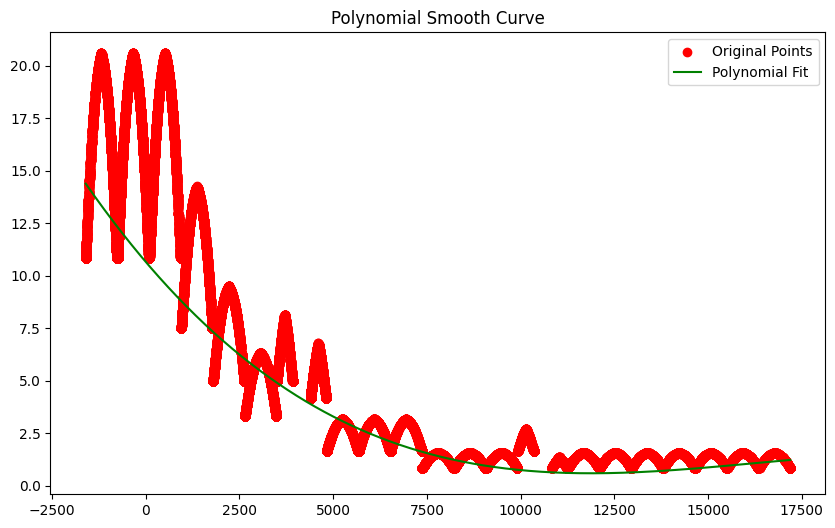

In [30]:
coefficients = np.polyfit(z, bz, 3)
polynomial = np.poly1d(coefficients)

# Generate smooth curve
z_smooth = np.linspace(z.min(), z.max(), 3000)
bz_smooth = polynomial(z_smooth)

plt.figure(figsize=(10, 6))
plt.scatter(z, bz, color='red', label='Original Points')
plt.plot(z_smooth, bz_smooth, 'g-', label='Polynomial Fit')
plt.legend()
plt.title('Polynomial Smooth Curve')
plt.show()

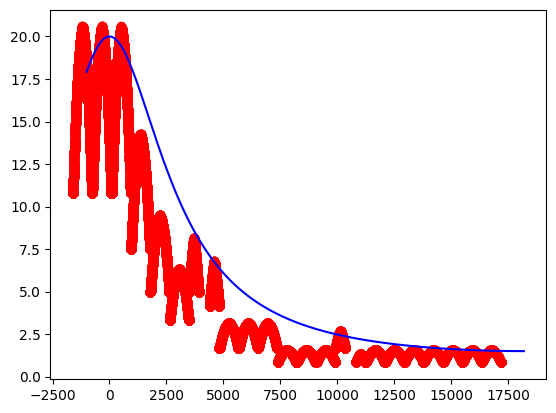

In [31]:
Bi = 20
Bf = 1.5
Lt = 18200
# -1< z < Lt
B = []

z_list = [i for i in range(-1000, 18201)] 

for zi in z_list:
    B_temp = (Bi*Bf*(Lt**3))/(Bi*(zi**2)*(3*Lt-2*zi)+Bf*((Lt-zi)**2)*(2*zi+Lt))
    B.append(B_temp)
    
plt.plot(z_list, B, color='blue')
plt.scatter(z,bz, color='red')
#plt.plot(z_smooth, bz_smooth, 'g-', label='Polynomial Fit')
plt.show()

In [61]:
data = pd.read_csv("6D_vector.csv")
data.head()

,Detector,ParticleType,x[cm],px[MeV/c],y[cm],py[MeV/c],z[cm],pz[MeV/c],TotalEnergy[MeV]
0,1,pi-,-3.188940,63.0506,-4.31303,-0.766929,399.95,1511.72,1519.45
1,2,pi-,-0.051591,-44.9386,13.52100,33.261700,1049.95,1510.48,1517.95
2,3,pi-,-21.970700,-37.5076,11.33450,-27.683200,1749.95,1509.28,1516.44
3,5,RF_in_pi-,-27.936200,-36.2348,6.93147,-27.414700,1990.00,1508.79,1515.91
4,6,RF_out_pi-,-28.416500,-36.2348,6.56807,-27.414700,2010.00,1508.79,1515.91


In [68]:
det = np.array(data['Detector'].to_list())
particle = np.array(data['ParticleType'].to_list())
px = np.array(data['px[MeV/c]'].to_list())
py = np.array(data['py[MeV/c]'].to_list())
pz = np.array(data['pz[MeV/c]'].to_list())
x = np.array(data['x[cm]'].to_list())
y = np.array(data['y[cm]'].to_list())
z = np.array(data['z[cm]'].to_list())
det1_particles = []
det1_px = []
det1_py = []
det1_pz = []
det1_x = []
det1_y = []
det1_z = []
det2_particles = []
det2_px = []
det2_py = []
det2_pz = []
det2_x = []
det2_y = []
det2_z = []
det3_particles = []
det3_px = []
det3_py = []
det3_pz = []
det3_x = []
det3_y = []
det3_z = []

In [69]:
for i in range(0, len(det)):
    if det[i] == 1:
        det1_particles.append(particle[i])
        det1_px.append(px[i])
        det1_py.append(py[i])
        det1_pz.append(pz[i])
        det1_x.append(x[i])
        det1_y.append(y[i])
        det1_z.append(z[i])
    elif det[i] == 2:
        det2_particles.append(particle[i])
        det2_px.append(px[i])
        det2_py.append(py[i])
        det2_pz.append(pz[i])
        det2_x.append(x[i])
        det2_y.append(y[i])
        det2_z.append(z[i])
    elif det[i] == 3:
        det3_particles.append(particle[i])
        det3_px.append(px[i])
        det3_py.append(py[i])
        det3_pz.append(pz[i])
        det3_x.append(x[i])
        det3_y.append(y[i])
        det3_z.append(z[i])

len(det3_particles)

471

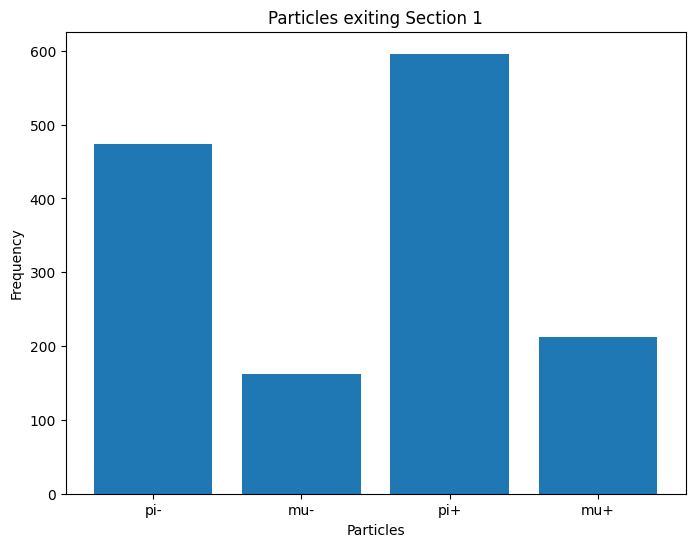

In [64]:
from collections import Counter

counts = Counter(det1_particles)
categories = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, values)
plt.xlabel('Particles')
plt.ylabel('Frequency')
plt.title('Particles exiting Section 1')
plt.show()

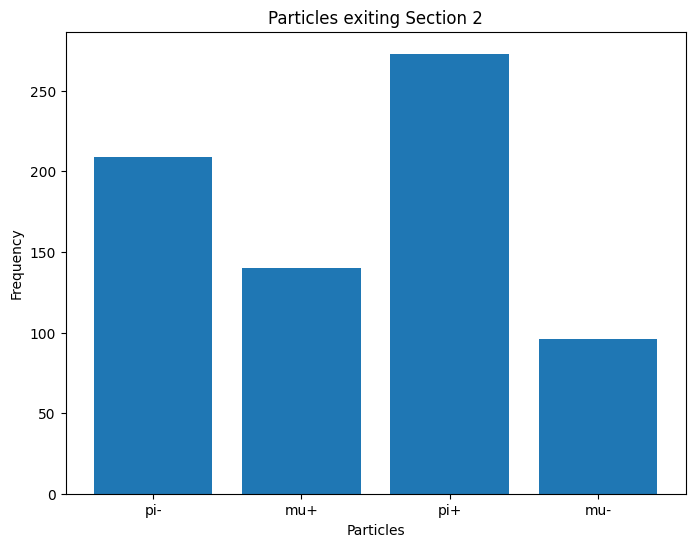

In [65]:
counts = Counter(det2_particles)
categories = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, values)
plt.xlabel('Particles')
plt.ylabel('Frequency')
plt.title('Particles exiting Section 2')
plt.show()

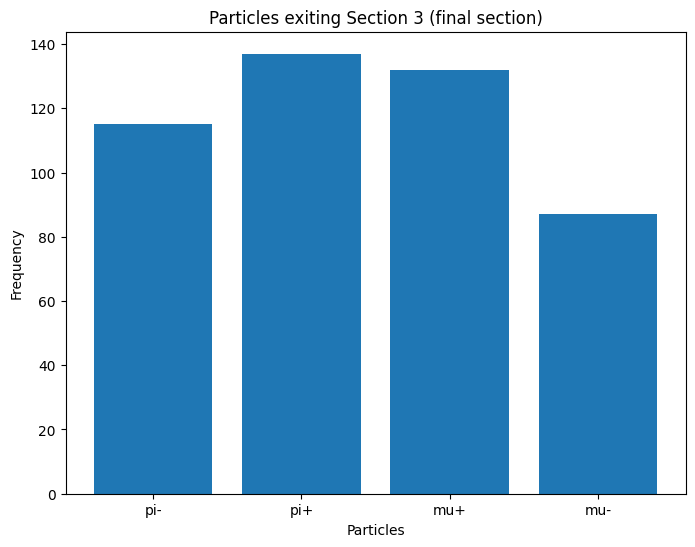

In [66]:
counts = Counter(det3_particles)
categories = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, values)
plt.xlabel('Particles')
plt.ylabel('Frequency')
plt.title('Particles exiting Section 3 (final section)')
plt.show()

In [67]:
 len(det3_particles)/len(det1_particles)

0.32617728531855955

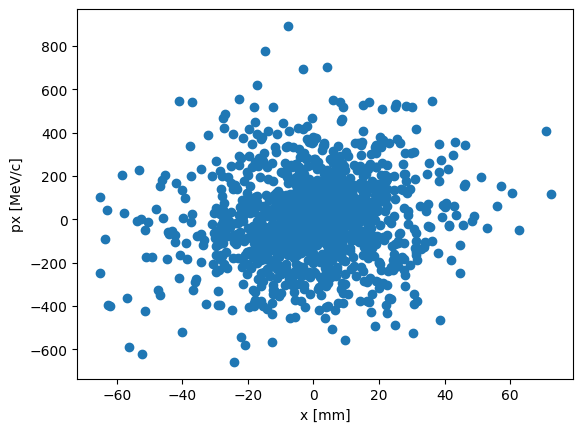

In [88]:
plt.scatter(det1_x,det1_px )
plt.xlabel("x [mm]")
plt.ylabel("px [MeV/c]")
plt.show()

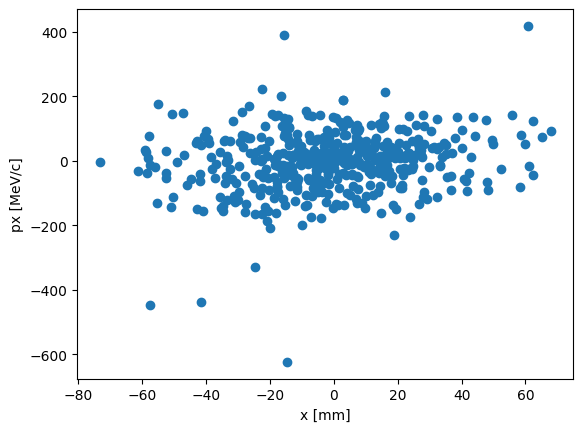

In [77]:
plt.scatter(det3_x,det3_px )
plt.xlabel("x [mm]")
plt.ylabel("px [MeV/c]")
plt.show()

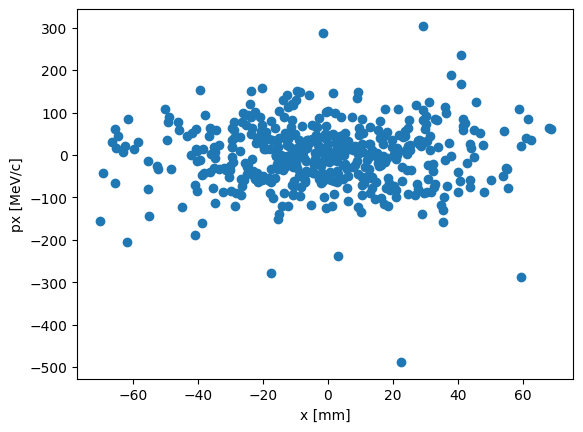

In [83]:
plt.scatter(det3_y,det3_py )
plt.xlabel("x [mm]")
plt.ylabel("px [MeV/c]")
plt.show()